# heatmaps

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
import plotly.express as px
import os
import pickle
import seaborn as sns

In [2]:
number_of_days = 11 #change this values based on number of days

## load files from folder

In [17]:
def pickle_from_folder(folder_path):
    # Initialize an empty list to store loaded data
    loaded_data = []

    # Iterate over files in the folder
    for filename in os.listdir(folder_path):
        # Check if the file is a pickle file
        if filename.endswith('.pickle'):
            file_path = os.path.join(folder_path, filename)
            try:
                # Open the pickle file in read-binary mode
                with open(file_path, 'rb') as file:
                    # Load the data from the pickle file
                    data = pickle.load(file)
                    loaded_data.append(data)
            except Exception as e:
                print(f"Error loading {filename}: {e}")
    return loaded_data

In [18]:
# Define the shared folder path
shared_path = "X:/Raymond Lab/1_Kai/3_processed_data/2_pickle/stage3"
days = [f"day{i}" for i in range(1, number_of_days + 1)]

# single flash heatmaps

In [19]:
def load_day_s(folder_path, day_name):
    # Load data for single and double trials
    s_v1_path = os.path.join(folder_path, "single", "v1")
    s_v1_data = pickle_from_folder(s_v1_path)

    # Calculate mean for single trials
    s_v1_means = [np.mean(data, axis=(1, 2)) for data in s_v1_data]
    avg_s_v1 = np.mean(np.stack(s_v1_means), axis=0)

    return avg_s_v1

In [20]:
all_averages_s = []
for day in days:
    folder_path = os.path.join(shared_path, day)
    all_averages_s.append(load_day_s(folder_path, day))


[Text(0.5, 33.249999999999986, 'frames (30fps)'), Text(79.75, 0.5, 'day')]

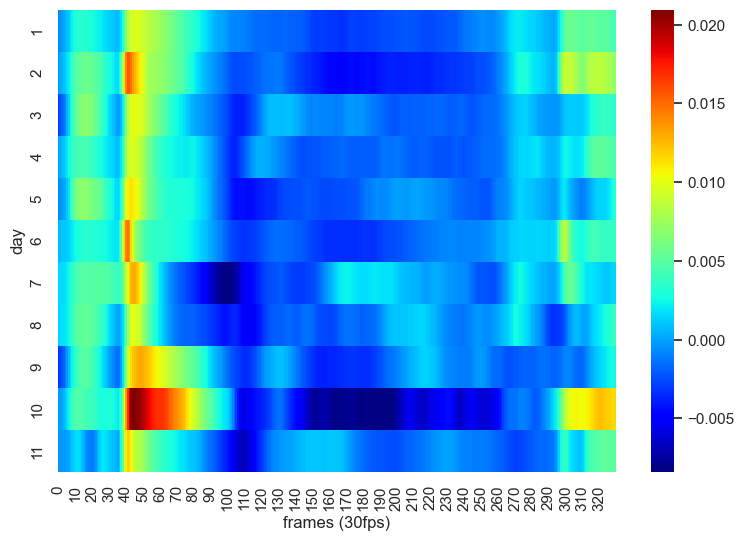

In [25]:
sns.set_theme()

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(all_averages_s, cmap = "jet")
ax.set_yticklabels([str(i) for i in range(1, len(all_averages_s) + 1)])
ax.set(xlabel="frames (30fps)", ylabel="day")

In [26]:
export_path = "X:/Raymond Lab/1_Kai/3_processed_data/4_heatmaps/single_stage3.png"
plt.savefig(export_path)

<Figure size 640x480 with 0 Axes>

# double flash heatmaps

In [8]:
def load_day_d(folder_path, day_name):
    d_v1_path = os.path.join(folder_path, "double", "v1")
    d_v1_data = pickle_from_folder(d_v1_path)

    # Calculate mean for single trials
    d_v1_means = [np.mean(data, axis=(1, 2)) for data in d_v1_data]
    avg_d_v1 = np.mean(np.stack(d_v1_means), axis=0)
    
    return avg_d_v1

In [9]:
all_averages_d = []
for day in days:
    folder_path = os.path.join(shared_path, day)
    all_averages_d.append(load_day_d(folder_path, day))


[Text(0.5, 33.249999999999986, 'frames (30fps)'), Text(79.75, 0.5, 'day')]

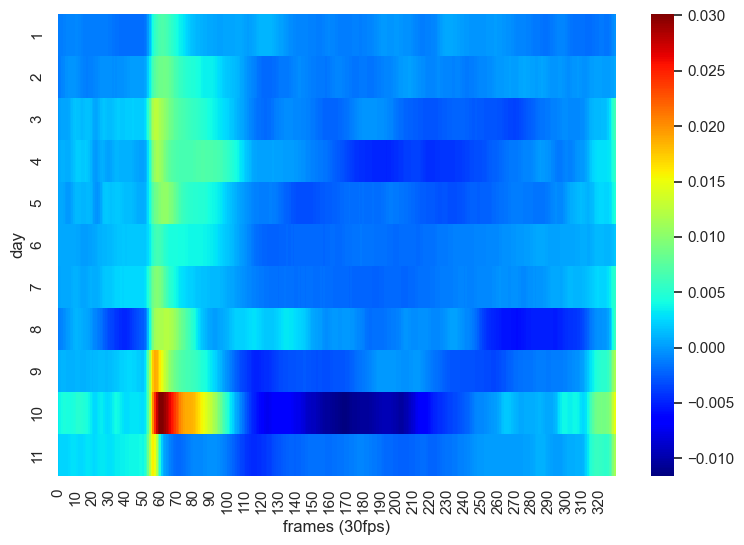

In [10]:
sns.set_theme()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(all_averages_d, cmap = "jet")
ax.set_yticklabels([str(i) for i in range(1, len(all_averages_d) + 1)])
ax.set(xlabel="frames (30fps)", ylabel="day")

In [24]:
export_path = "X:/Raymond Lab/1_Kai/3_processed_data/4_heatmaps/double_stage3.png"
plt.savefig(export_path)

<Figure size 640x480 with 0 Axes>